[datasets](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

import re

from scipy import sparse

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error


from scipy.stats import uniform
from scipy.stats import randint

# First Touch of data 

In [2]:
df = pd.read_csv("D:/MachineLearning/Kaggle/data/spotify_songs.csv")

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Split training and testing dataset

In [4]:
df_1 = df.copy() # 保留原 data
df_train, df_test = train_test_split(df_1, test_size=0.2, random_state=42)

# EDA

In [146]:
df.loc[df["track_popularity"] == 0]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.113,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,2014-03-31,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.654,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000


# Preprocessing

In [5]:
df_train_num = df_train.iloc[:, [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] # 含 key 和 mode
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["key", "mode"])]

df_train_cat = df_train.drop(columns= df_train_num.columns)

df_train_num.head()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12593,68,0.415,0.658,-12.051,0.0696,0.000045,0.000735,0.1760,0.450,163.015,168406
791,1,0.655,0.884,-6.515,0.0602,0.010200,0.000000,0.2590,0.772,140.008,219240
25523,33,0.847,0.696,-6.113,0.0642,0.052000,0.004020,0.0795,0.763,140.678,183253
31510,0,0.596,0.910,-5.937,0.0385,0.000629,0.001370,0.1780,0.484,127.963,182461
10241,45,0.877,0.665,-6.116,0.0538,0.406000,0.000035,0.2320,0.143,122.004,199078


## Transformation for numerical variables

Check distributions first.

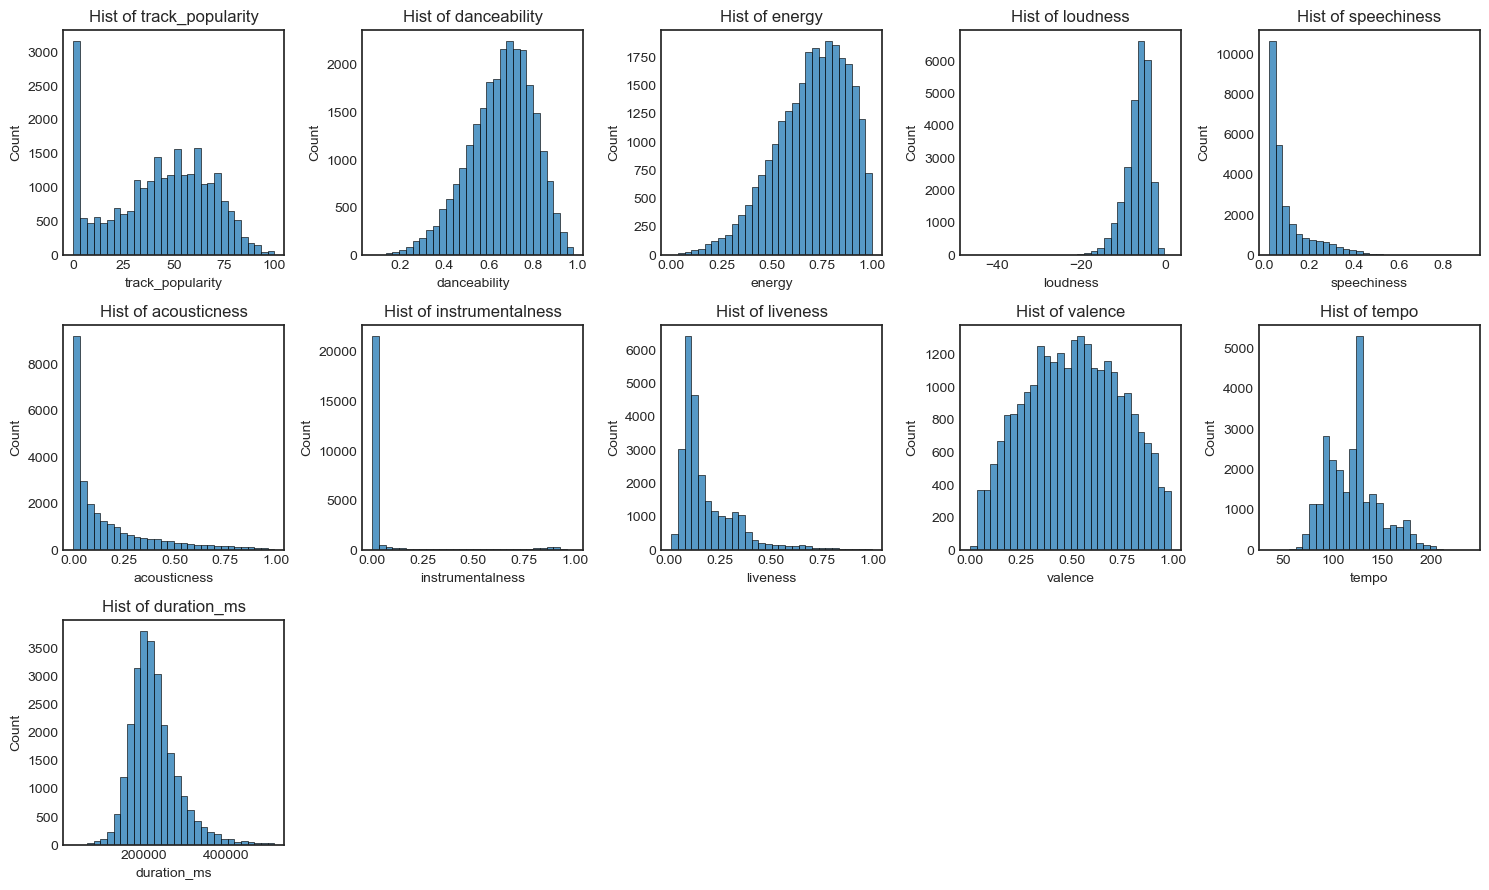

In [6]:
figure, axes = plt.subplots(3, 5, figsize = (15,9))

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i], ax = axes[0,i], bins=30 )
    axes[0,i].set_title(f"Hist of {df_train_num.columns[i]}")

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i+5], ax = axes[1,i], bins=30)
    axes[1,i].set_title(f"Hist of {df_train_num.columns[i+5]}")

sns.histplot(df_train_num.iloc[:,10], ax = axes[2,0], bins=30)
axes[2,0].set_title(f"Hist of {df_train_num.columns[10]}")

for ax in axes.flat[11:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [7]:
col_lis = ['track_popularity', 'speechiness', 'acousticness', 'instrumentalness']

for col in col_lis:
    print(f"0 value proportion in {col}: ", (df_train_num[col] == 0).sum() / df_train_num.shape[0])


0 value proportion in track_popularity:  0.08162643721921876
0 value proportion in speechiness:  0.0
0 value proportion in acousticness:  0.0
0 value proportion in instrumentalness:  0.3683088403258966


No need to transform since we foucs on the tree-based algorithms.

### Correlation

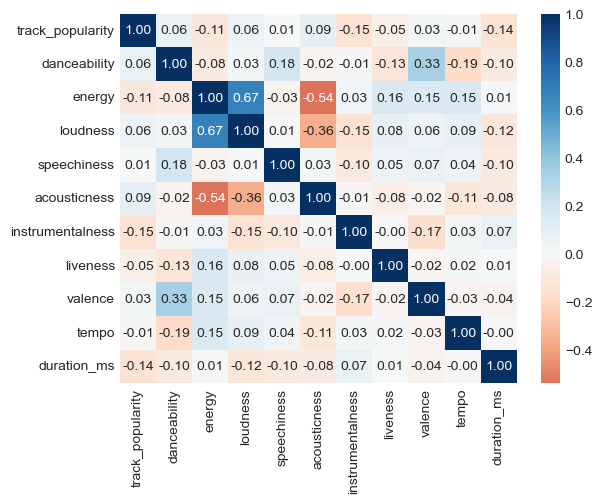

In [8]:
corr = df_train_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.show()

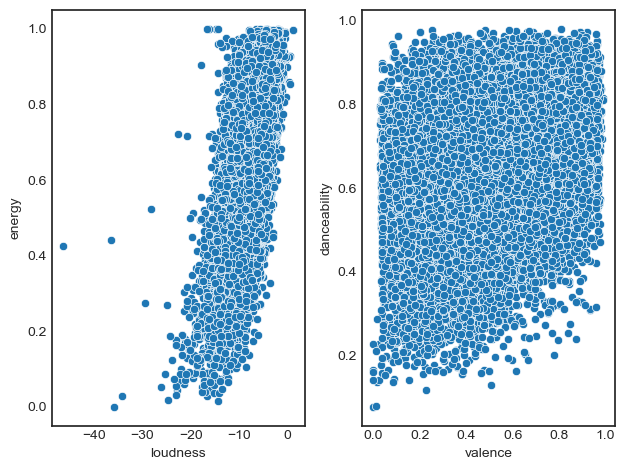

In [9]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(x = df_train_num["loudness"], y = df_train_num["energy"], ax=axes[0])

sns.scatterplot(x = df_train_num["valence"], y = df_train_num["danceability"], ax=axes[1])
plt.tight_layout()
plt.show()

It's commen sense that the louder the music, the more energy it has. We combine these two columns, assign them equal weights. And transform acousticness to binary categorical variable.

In [10]:
df_train_num["loudness_energy_combined"] = (df_train_num["loudness"] + df_train_num["energy"]) / 2
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["energy", "loudness"])]

df_train_num["acousticness"] = np.where(df_train_num["acousticness"] > 0.5, "acoustic", "non-acoustic")

df_train_cat = pd.concat([df_train_cat, df_train_num["acousticness"]], axis=1)
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["acousticness"])]

把 y 分出来

In [11]:
mask = df_train_num[df_train_num["track_popularity"] != 0].index
df_train_num = df_train_num.loc[mask]
df_train_cat = df_train_cat.loc[mask]

In [12]:
y_train = df_train_num.iloc[:, 0].to_numpy()
df_train_num = df_train_num.iloc[:, 1:]

Summarize previous all into one function 

In [13]:
def creat_df_combo_and_y(df):
    df_num = df.iloc[:, [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] # 含 key 和 mode
    df_num = df_num.loc[:, ~ df_num.columns.isin(["key", "mode"])]

    df_cat = df.drop(columns= df_num.columns)

    df_num["loudness_energy_combined"] = (df_num["loudness"] + df_num["energy"]) / 2
    df_num = df_num.loc[:, ~ df_num.columns.isin(["energy", "loudness"])]

    df_num["acousticness"] = np.where(df_num["acousticness"] > 0.5, "acoustic", "non-acoustic")

    df_cat = pd.concat([df_cat, df_num["acousticness"]], axis=1)
    df_num = df_num.loc[:, ~ df_num.columns.isin(["acousticness"])]

    mask = df_num[df_num["track_popularity"] != 0].index
    df_num = df_num.loc[mask]
    df_cat = df_cat.loc[mask]

    y = df_num.iloc[:, 0].to_numpy()
    df_num = df_num.iloc[:, 1:]

    return (y, df_cat, df_num)

In [14]:
y_train, df_train_cat, df_train_num = creat_df_combo_and_y(df_train)
y_test, df_test_cat, df_test_num =creat_df_combo_and_y(df_test)

In [15]:
df_train_cat.to_csv("dataset/df_train_cat_rs_42.csv", index=True, encoding="utf-8")
df_train_num.to_csv("dataset/df_train_num_rs_42.csv", index=True, encoding="utf-8")

df_test_cat.to_csv("dataset/df_test_cat_rs_42.csv", index=True, encoding="utf-8")
df_test_num.to_csv("dataset/df_test_num_rs_42.csv", index=True, encoding="utf-8")

## Categorical Variable

Relation among all the qualitative attributes that we have not processed so far.

<div align="center">
    <img src="./Song.png" width="600">
</div>

### Bag-of-word Matrix

For each song, we concatenate the `song title`, `album name`, `playlist genre` and `sub-playlist genre`, then based on the concatenated sentences, we create a bag-of-word matrix. 

#### Text cleaning

In [16]:
df_train_cat = pd.read_csv("dataset/df_train_cat_rs_42_processed.csv", index_col=0)

#### Create Word Matrix + Categorical Varaible Encoding

Custom transformer for creating top-frequent word matrix. 

In [18]:
# 1. key one-h array 2.mode one-h array #3 key-mode interaction df
# 4. acousticness one-h 
def key_mode_interaction_encode(X):
    key_encoder = OneHotEncoder()
    mode_encoder = OneHotEncoder()
    acoustic_encoder = OneHotEncoder()

    key_onehot = key_encoder.fit_transform(X[['key']])  
    mode_onehot = mode_encoder.fit_transform(X[['mode']])
    acoustic_onehot = acoustic_encoder.fit_transform(X[["acousticness"]])

    n_samples, n_keys = key_onehot.shape 
    _, n_modes = mode_onehot.shape

    #key_mode_interaction_matrix = np.einsum('ij,ik->ijk', key_onehot.toarray(), mode_onehot.toarray()).reshape(key_onehot.shape[0], -1)
    
    key_idx = key_onehot.nonzero()[1]
    mode_idx = mode_onehot.nonzero()[1]
    rows = np.arange(n_samples)

    interaction_idx = key_idx * n_modes + mode_idx
    interaction_data = np.ones_like(rows, dtype=float)
    

    #key_labels = key_encoder.categories_[0]
    #mode_labels = mode_encoder.categories_[0]
    #interaction_columns = [f'key_{k}_x_mode_{m}' for k in key_labels for m in mode_labels

    key_mode_interaction = sparse.csr_matrix(
        (interaction_data, (rows, interaction_idx)),
        shape=(n_samples, n_keys * n_modes)
    )

    #return (key_onehot.toarray() , mode_onehot.toarray() , 
    #        pd.DataFrame(key_mode_interaction_matrix, columns=interaction_columns),
    #        acoustic_onehot.toarray())

    # all sparse
    return key_onehot, mode_onehot, key_mode_interaction, acoustic_onehot

In [25]:
class text_token_transformer_plus_encoding(BaseEstimator, TransformerMixin):
    def __init__(self, quant = 0.9): # inital quantile 0.9
        self.quant = quant
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')
        
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        self.acoustic_encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix
        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self.term_counts_ = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()

        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        self.acoustic_encoder.fit(X[["acousticness"]])
        return self
    
    def transform(self, X, y = None):
        #threshold = pd.Series(self.term_counts_).quantile(self.quant)
        threshold = np.quantile(self.term_counts_, self.quant)
        
        #sort_lis = sorted(zip(self.term_counts_, self.terms_), key = lambda x: x[0], reverse= True)
        #sort_lis_cut = [pair for pair in sort_lis if pair[0] >= threshold]
        #word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted

        keep_idx = np.where(self.term_counts_ >= threshold)[0]
        keep_terms = self.terms_[keep_idx]

        #word_df = pd.DataFrame(self.word_matrix_, columns=self.terms_)
        #word_df = word_df[word_lis_sorted] # left to right columns, down 
        word_matrix = self.word_matrix_[:, keep_idx]

        ### encoding part
        key_cat_matrix = key_mode_interaction_encode(X)[0]
        mode_cat_matrix = key_mode_interaction_encode(X)[1]
        key_mode_cat_interaction_matrix = key_mode_interaction_encode(X)[2]
        acoustic_cat_matrix = key_mode_interaction_encode(X)[3]

        final_mat = sparse.hstack([word_matrix, key_cat_matrix, mode_cat_matrix, key_mode_cat_interaction_matrix, acoustic_cat_matrix], format="csr")
        
        return final_mat

## Training Matrix

cleaned combined text &rarr; word matrix &rarr; combined columns 1: $\begin{bmatrix} \text{word matrix columns} & \text{categorical encoding matrix columns}  \end{bmatrix}$ &rarr; $\begin{bmatrix} \text{combined columns 1} & \text{numerical columns}  \end{bmatrix}$

### Scaling + Final concat Pipeline

In [26]:
df_train_combo = pd.concat([df_train_cat, df_train_num], axis = 1)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler_column = ColumnTransformer(
    transformers=[(
        "num", StandardScaler(), 
                  ['danceability', 'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'loudness_energy_combined']
    )
                  ],
                  remainder="drop"
)

In [28]:
from sklearn.pipeline import FeatureUnion

# 平行处理categorical 和 numerical，最后 concatenate
# Input: df_train_cat + df_num_cat
Pipe_create_mat = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding(quant=0.9)), # sparse matrix
    ('numerical', scaler_column)
])

# Model training

<ul>
  <li>
    Model training
    <ul>
      <li>
        Original Training Matrix (Baseline)
      </li>
      <li>
        Training Matrix with Unsupervised Technique
        <ul>
          <li>Dimension Reduction</li>
          <li>Anomaly detection</li>
        </ul>
      </li>
            <li>
        Training Matrix with Feature selection
        <ul>
          <li>LASOO</li>
          <li>Step-wise</li>
        </ul>
      </li>
    </ul>
  </li>
</ul>

Tree based algorithms: Random Forest, XGBoost, LightGBM

## Numeric-only Training Matrix (Baseline)

Only use numerical features as our baseline models

### Random Forest

In [25]:
params_rf = {
    'n_estimators': 374,
    'max_depth': 11,
    'min_samples_split': 7,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    }

In [26]:
rf_reg = RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123)
rf_reg.fit(df_train_num, y_train)

RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=7, n_estimators=374, random_state=123)

In [27]:
pred_rf_base = rf_reg.predict(df_train_num)
print("Baseline Random Forest training MSE: ", mean_squared_error(pred_rf_base, y_train))
print("Baseline Random Forest training R^2: ", r2_score(pred_rf_base, y_train))

print("\n")
pred_rf_base = rf_reg.predict(df_test_num)
print("Baseline Random Forest testing MSE: ", mean_squared_error(pred_rf_base, y_test))
print("Baseline Random Forest testing R^2: ", r2_score(pred_rf_base, y_test))

Baseline Random Forest training MSE:  365.29303054188296
Baseline Random Forest training R^2:  -7.300919765014642


Baseline Random Forest testing MSE:  426.4110863214464
Baseline Random Forest testing R^2:  -10.782760396637627


In [ ]:
# random search of random forest
param_distributions = {
    'n_estimators': randint(100, 500), 
    'max_depth': randint(3, 20),             
    'min_samples_split': randint(2, 11),     
    'min_samples_leaf': randint(1, 11),       
    'max_features': ['sqrt'],
}

random_search_rf = RandomizedSearchCV(
    estimator= rf_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5
)

search_result_rf = random_search_rf.fit(train_mat, y_train)
search_result_rf

pred_rf = search_result_rf.best_estimator_.predict(train_mat)
print("Random Forest MSE: ", mean_squared_error(pred_rf, y_train))

### XGBoost

In [29]:
params_xgb = {
    'n_estimators': 347,        # randint(100, 500)
    'learning_rate': 0.173,     # uniform(0.01, 0.29)
    'max_depth': 8,             # randint(3, 10)
    'subsample': 0.5,           # uniform(0.5, 0.5)
    'colsample_bytree': 0.5,    # uniform(0.5, 0.5)
    'gamma': 0.327,             # uniform(0, 0.5)
    'reg_lambda': 2.64          # uniform(1, 4)
}

xgb_reg = xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state=123)
xgb_reg.fit(df_train_num, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.327, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.173, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=347,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
pred_xgb_base = xgb_reg.predict(df_train_num)
print("Baseline XG Boost training MSE: ", mean_squared_error(pred_xgb_base, y_train))
print("Baseline XG Boost training R^2: ", r2_score(pred_xgb_base, y_train))

print("\n")
pred_xgb_base = xgb_reg.predict(df_test_num)
print("Baseline XG Boost testing MSE: ", mean_squared_error(pred_xgb_base, y_test))
print("Baseline XG Boost testing R^2: ", r2_score(pred_xgb_base, y_test))

Baseline XG Boost training MSE:  97.98063659667969
Baseline XG Boost training R^2:  0.744312047958374


Baseline XG Boost testing MSE:  519.37255859375
Baseline XG Boost testing R^2:  -1.038079023361206


In [ ]:
# random search of xgb
param_distributions = {
    'n_estimators': randint(100, 500), 
    'learning_rate': uniform(0.01, 0.29),

    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),

    'gamma': uniform(0, 0.5),
    'reg_lambda': uniform(1, 4)
}

random_search_xgb = RandomizedSearchCV(
    estimator= xgb_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

search_result_xgb = random_search_xgb.fit(train_mat, y_train)
search_result_xgb.best_params_

pred_xgb = search_result_xgb.best_estimator_.predict(train_mat)
print("XGBoost MSE: ", mean_squared_error(pred_xgb, y_train))

### LightGBM

In [30]:
params_lgb = {
    'n_estimators': 786,
    'learning_rate': 0.073,
    'num_leaves': 67,
    'max_depth': 12,
    'min_child_samples': 28,
    'subsample': 0.73,
    'colsample_bytree': 0.84,
    'reg_alpha': 0.32,
    'reg_lambda': 0.61
}

lgb_reg = lgb.LGBMRegressor(**params_lgb, objective='regression_l2', eval_metric = 'rmse', random_state=123)
lgb_reg.fit(df_train_num, y_train)

d:\miniconda3\envs\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\miniconda3\envs\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\miniconda3\envs\pydata-book\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 24122, number of used features: 8
[LightGBM] [Info] Start training from score 46.327916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse', learning_rate=0.073,
              max_depth=12, min_child_samples=28, n_estimators=786,
              num_leaves=67, objective='regression_l2', random_state=123,
              reg_alpha=0.32, reg_lambda=0.61, subsample=0.73)

In [31]:
pred_lgb_base = lgb_reg.predict(df_train_num)
print("Baseline Light Gradient Boosting training MSE: ", mean_squared_error(pred_lgb_base, y_train))
print("Baseline Light Gradient Boosting training R^2: ", r2_score(pred_lgb_base, y_train))

print("\n")
pred_lgb_base = lgb_reg.predict(df_test_num)
print("Baseline Light Gradient Boosting testing MSE: ", mean_squared_error(pred_lgb_base, y_test))
print("Baseline Light Gradient Boosting testing R^2: ", r2_score(pred_lgb_base, y_test))

[LightGBM] [Warning] Unknown parameter: eval_metric
Baseline Light Gradient Boosting training MSE:  123.17895107894896
Baseline Light Gradient Boosting training R^2:  0.4539550148951994


[LightGBM] [Warning] Unknown parameter: eval_metric
Baseline Light Gradient Boosting testing MSE:  385.93445822665626
Baseline Light Gradient Boosting testing R^2:  -1.6155451556383889


In [ ]:
# random search of lgb
param_distributions = {
    'n_estimators': randint(200, 1000), 
    'learning_rate': uniform(0.01, 0.1),

    'num_leaves': randint(20, 100),
    'max_depth': randint(7, 15),
    'min_child_samples': randint(10, 50),

    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),

    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

random_search_lgb = RandomizedSearchCV(
    estimator= lgb_reg,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

search_result_lgb = random_search_lgb.fit(train_mat, y_train)

search_result_lgb.best_estimator_

pred_lgb = search_result_lgb.best_estimator_.predict(train_mat)
print("light gbm MSE: ", mean_squared_error(pred_lgb, y_train))

## Complete training matrix

In [32]:
df_test_cat = pd.read_csv("dataset/df_test_cat_rs_42_processed.csv", index_col=0)
df_test_combo = pd.concat([df_test_cat, df_test_num], axis = 1)

### Random Forest

In [33]:
Pipe_randomforest = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('rf', RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123))
])

Pipe_randomforest.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]))])),
                ('rf',
                 RandomForestRegressor(max_depth=11, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=7,
                                       n_estimators=374, random_state=123))])

In [34]:
pred_rf_complete_mat = Pipe_randomforest.predict(df_train_combo)
print("Random Forest with complete training matrix MSE: ", mean_squared_error(pred_rf_complete_mat, y_train))
print("Random Forest with complete training matrix R^2: ", r2_score(pred_rf_complete_mat, y_train))

print("\n")
df_test_mat = Pipe_create_mat.fit_transform(df_test_combo)
df_test_mat.shape
#pred_rf_complete_mat = Pipe_randomforest.named_steps['rf'].predict(df_test_mat)
#print("Baseline Random Forest testing MSE: ", mean_squared_error(pred_rf_complete_mat, y_test))
#print("Baseline Random Forest testing R^2: ", r2_score(pred_rf_complete_mat, y_test))

Random Forest with complete training matrix MSE:  450.280869744008
Random Forest with complete training matrix R^2:  -30.659788716727185




(6008, 741)

In [122]:
text_token_transformer_plus_encoding(quant=0.9).fit_transform(df_train_combo)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 195878 stored elements and shape (24122, 1424)>

In [123]:
Pipe_create_mat.fit_transform(df_train_combo)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 388854 stored elements and shape (24122, 1432)>

In [124]:
Pipe_create_mat.fit_transform(df_test_combo)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95084 stored elements and shape (6008, 741)>

### XG Boost

In [33]:
Pipe_xgb = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_xgb.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]))])),
                ('xgb',
                 XGBRegressor(base_scor...
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [34]:
pred_xgb_complete_mat = Pipe_xgb.predict(df_train_combo)
print("XG Boost with complete training matrix MSE: ", mean_squared_error(pred_xgb_complete_mat, y_train))
print("XG Boost with complete training matrix R^2: ", r2_score(pred_xgb_complete_mat, y_train))

XG Boost with complete training matrix MSE:  263.8441467285156
XG Boost with complete training matrix R^2:  -0.1670745611190796


### Light GBM

In [37]:
Pipe_lgb = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat),
    ('lgb', lgb.LGBMRegressor(**params_lgb,  objective='regression_l2', eval_metric = 'rmse', random_state=123))
])

Pipe_lgb.fit(df_train_combo, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 24122, number of used features: 419
[LightGBM] [Info] Start training from score 46.327916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding()),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]))])),
                ('lgb',
                 LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse',
                               learning_rate=0.073, max_depth=12,
                               min_child_samples=28, n_estimators=786,
                               num_leaves=67, objective='regression_l2',
                               random_state=123, reg_alpha=0.32,
                               reg_lambda=0.61, subsample=0.73))])

In [38]:
pred_lgb_complete_mat = Pipe_lgb.predict(df_train_combo)
print("Light GBM with complete training matrix MSE: ", mean_squared_error(pred_lgb_complete_mat, y_train))
print("Light GBM with complete training matrix R^2: ", r2_score(pred_lgb_complete_mat, y_train))

[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with complete training matrix MSE:  144.96860610612183
Light GBM with complete training matrix R^2:  0.3207010362956104


d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Training Matrix with Dimension Reduction(new)

Since we are dealing with word matrix, truncated SVD can have better results than PCA

### Word Matrix Analysis

In [35]:
class text_token_transformer_plus_encoding_1(BaseEstimator, TransformerMixin):
    def __init__(self, quant = 0.9): # inital quantile 0.9
        self.quant = quant
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix
        self.term_counts_ = self.word_matrix_.sum(axis=0).A1
        self.terms_ = self.vectorizer_.get_feature_names_out()
        return self
    
    def transform(self, X, y = None):
        threshold = np.quantile(self.term_counts_, self.quant)

        keep_idx = np.where(self.term_counts_ >= threshold)[0]
        keep_terms = self.terms_[keep_idx]
        word_matrix = self.word_matrix_[:, keep_idx]

        final_mat = word_matrix
        
        return final_mat

word_mat = text_token_transformer_plus_encoding_1().fit_transform(df_train_combo)

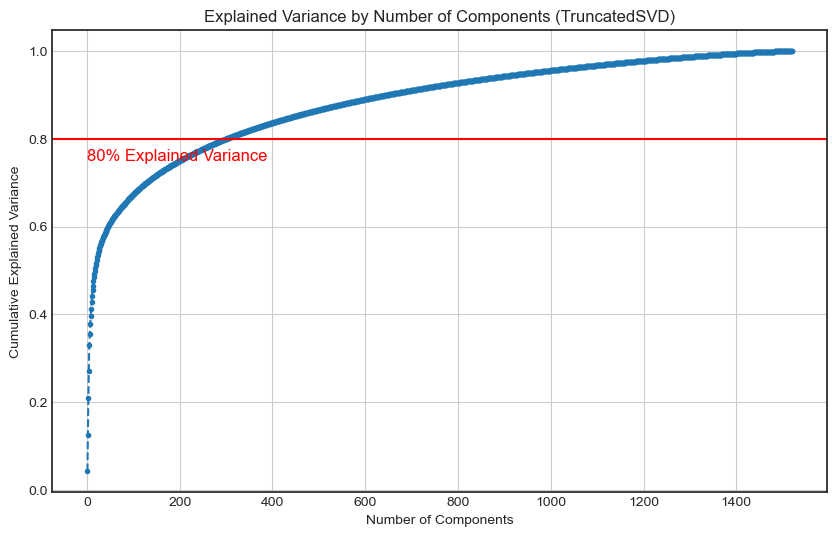

In [36]:
svd = TruncatedSVD(n_components=word_mat.shape[1] - 1, random_state=72)
svd.fit(word_mat)

cumulative_variance_ratio_svd = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_svd) + 1), cumulative_variance_ratio_svd, marker='.', linestyle='--')
plt.title('Explained Variance by Number of Components (TruncatedSVD)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% Explained Variance', color = 'red', fontsize=12)
plt.show()

In [37]:
# 44 ~ 280
print("Number of components that explain 60% variance: ",len(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.6])) 
print("Number of components that explain 80% variance: ",len(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])) 
(cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])[42], (cumulative_variance_ratio_svd[cumulative_variance_ratio_svd <= 0.8])[278]

Number of components that explain 60% variance:  45
Number of components that explain 80% variance:  299


(np.float64(0.5956145949014562), np.float64(0.7912097493322664))

New custom transformer (truncated svd added), reduced dimension set to 280

In [38]:
class text_token_transformer_plus_encoding_plus_decomposition(BaseEstimator, TransformerMixin):
    def __init__(self, quant = 0.9, n_components=100): # inital quantile 0.9
        self.quant = quant
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')
        
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        self.acoustic_encoder = OneHotEncoder()

        self.n_components = n_components
        self.svd = TruncatedSVD(n_components= self.n_components, random_state=68)

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix

        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self._term_counts = self.word_matrix_.sum(axis=0).A1
        #self.terms_ = self.vectorizer_.get_feature_names_out()
        self._keep_idx = np.where(self._term_counts >= np.quantile(self._term_counts, self.quant))[0]
        self.svd.fit(self.word_matrix_[:, self._keep_idx])

        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        self.acoustic_encoder.fit(X[["acousticness"]])

        return self
    
    def transform(self, X, y = None):

        word_mat = self.vectorizer_.transform(X["combined_text"])[:, self._keep_idx]
        word_mat = sparse.csr_matrix(self.svd.transform(word_mat))
        
        ### encoding part
        key_cat_matrix = key_mode_interaction_encode(X)[0]
        mode_cat_matrix = key_mode_interaction_encode(X)[1]
        key_mode_cat_interaction_matrix = key_mode_interaction_encode(X)[2]
        acoustic_cat_matrix = key_mode_interaction_encode(X)[3]

        acoustic_cat_matrix = self.acoustic_encoder.transform(X[["acousticness"]]) # 4

        final_mat = sparse.hstack([word_mat, key_cat_matrix, mode_cat_matrix, key_mode_cat_interaction_matrix, acoustic_cat_matrix], format="csr")
        
        return final_mat

In [39]:
Pipe_create_mat_svd = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding_plus_decomposition(quant=0.9, n_components=280)), # sparse matrix
    ('numerical', scaler_column)
])

### Initial quantile: 0.9

#### Random Forest

In [57]:
Pipe_randomforest_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('rf', RandomForestRegressor(**params_rf, bootstrap=True, random_state= 123))
])

Pipe_randomforest_svd.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=280)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]))])),
                ('rf',
                 RandomForestRegressor(max_depth=11, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=7,
                                       n_estimators=374, random_state=123))])

In [45]:
pred_rf_svd_mat = Pipe_randomforest_svd.predict(df_train_combo)
print("Random Forest with demension reduced training matrix MSE: ", mean_squared_error(pred_rf_svd_mat, y_train))
print("Random Forest with demension reduced training matrix R^2: ", r2_score(pred_rf_svd_mat, y_train))

print("\n")
pred_rf_svd_mat = Pipe_randomforest_svd.predict(df_test_combo)
print("Random Forest with demension reduced testing matrix MSE: ", mean_squared_error(pred_rf_svd_mat, y_test))
print("Random Forest with demension reduced testing matrix R^2: ", r2_score(pred_rf_svd_mat, y_test))

Random Forest with demension reduced training matrix MSE:  324.5350622044141
Random Forest with demension reduced training matrix R^2:  -3.7555222307550196


Random Forest with demension reduced testing matrix MSE:  426.10060314456456
Random Forest with demension reduced testing matrix R^2:  -7.292274661992902


#### XG Boost

In [40]:
Pipe_xgb_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('xgb', xgb.XGBRegressor(**params_xgb, objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

Pipe_xgb_svd.fit(df_train_combo, y_train)

Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=280)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]...
                              feature_types=None, feature_weights=None,
                              gamma=0.327, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.173,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=347, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [41]:
pred_xgb_svd_mat = Pipe_xgb_svd.predict(df_train_combo)
print("XG Boost with demension reduced training matrix MSE: ", mean_squared_error(pred_xgb_svd_mat, y_train))
print("XG Boost with demension reduced training matrix R^2: ", r2_score(pred_xgb_svd_mat, y_train))

print("\n")
pred_xgb_svd_mat = Pipe_xgb_svd.predict(df_test_combo)
print("XG Boost with demension reduced testing matrix MSE: ", mean_squared_error(pred_xgb_svd_mat, y_test))
print("XG Boost with demension reduced testing matrix R^2: ", r2_score(pred_xgb_svd_mat, y_test))

XG Boost with demension reduced training matrix MSE:  39.41352462768555
XG Boost with demension reduced training matrix R^2:  0.9241753220558167


XG Boost with demension reduced testing matrix MSE:  559.4049682617188
XG Boost with demension reduced testing matrix R^2:  -1.1338865756988525


#### Light GBM

In [49]:
Pipe_lgb_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('lgb', lgb.LGBMRegressor(**params_lgb,  objective='regression_l2', eval_metric = 'rmse', random_state=123))
])

Pipe_lgb_svd.fit(df_train_combo, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73520
[LightGBM] [Info] Number of data points in the train set: 24122, number of used features: 328
[LightGBM] [Info] Start training from score 46.327916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('num_cat_word_matrix',
                 FeatureUnion(transformer_list=[('categorical',
                                                 text_token_transformer_plus_encoding_plus_decomposition(n_components=280)),
                                                ('numerical',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  ['danceability',
                                                                                   'speechiness',
                                                                                   'instrumentalness',
                                                                                   'liveness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'duration_ms',
                                                                                   'loudness_energy_combined'])]))])),
                ('lgb',
                 LGBMRegressor(colsample_bytree=0.84, eval_metric='rmse',
                               learning_rate=0.073, max_depth=12,
                               min_child_samples=28, n_estimators=786,
                               num_leaves=67, objective='regression_l2',
                               random_state=123, reg_alpha=0.32,
                               reg_lambda=0.61, subsample=0.73))])

In [50]:
pred_lgb_svd_mat = Pipe_lgb_svd.predict(df_train_combo)
print("Light GBM with demension reduced training matrix MSE: ", mean_squared_error(pred_lgb_svd_mat, y_train))
print("Light GBM with demension reduced training matrix R^2: ", r2_score(pred_lgb_svd_mat, y_train))

print("\n")
pred_lgb_svd_mat = Pipe_lgb_svd.predict(df_test_combo)
print("Light GBM with demension reduced testing matrix MSE: ", mean_squared_error(pred_lgb_svd_mat, y_test))
print("Light GBM with demension reduced testing matrix R^2: ", r2_score(pred_lgb_svd_mat, y_test))

d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with demension reduced training matrix MSE:  53.357693050688184
Light GBM with demension reduced training matrix R^2:  0.8472887036418822


[LightGBM] [Warning] Unknown parameter: eval_metric
Light GBM with demension reduced testing matrix MSE:  394.7807578152485
Light GBM with demension reduced testing matrix R^2:  -1.6246727815677264


d:\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### 尝试在dimension reduction基础上调优

#### XG Boost

In [86]:
params_xgb

{'n_estimators': 347,
 'learning_rate': 0.173,
 'max_depth': 8,
 'subsample': 0.5,
 'colsample_bytree': 0.5,
 'gamma': 0.327,
 'reg_lambda': 2.64}

In [87]:
search_result_xgb.best_params_

{'xgb__colsample_bytree': np.float64(0.8681533505153021),
 'xgb__gamma': np.float64(0.31341081859585873),
 'xgb__learning_rate': np.float64(0.04097155029153238),
 'xgb__max_depth': 7,
 'xgb__n_estimators': 217,
 'xgb__reg_lambda': np.float64(1.1345411015798281),
 'xgb__subsample': np.float64(0.9450871558662147)}

In [79]:
# random search of xgb
param_distributions = {
    'xgb__n_estimators': randint(100, 500), 
    'xgb__learning_rate': uniform(0.01, 0.29),

    'xgb__max_depth': randint(3, 10),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5),

    'xgb__gamma': uniform(0, 0.5),
    'xgb__reg_lambda': uniform(1, 4)
}

Pipe_xgb_svd = Pipeline([
    ("num_cat_word_matrix", Pipe_create_mat_svd),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', eval_metric = 'rmse', random_state= 123))
])

random_search_xgb = RandomizedSearchCV(
    estimator= Pipe_xgb_svd,
    param_distributions=param_distributions,
    n_iter= 50,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

search_result_xgb = random_search_xgb.fit(df_train_combo, y_train)
#search_result_xgb.best_params_

#pred_xgb = search_result_xgb.best_estimator_.predict(train_mat)
#print("XGBoost MSE: ", mean_squared_error(pred_xgb, y_train))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [90]:
pred_xgb = search_result_xgb.best_estimator_.predict(df_train_combo)

print("XG Boost with demension reduced training matrix MSE: ", mean_squared_error(pred_xgb, y_train))
print("XG Boost with demension reduced training matrix R^2: ", r2_score(pred_xgb, y_train))

print("\n")
pred_xgb = search_result_xgb.best_estimator_.predict(df_test_combo)
print("XG Boost with demension reduced testing matrix MSE: ", mean_squared_error(pred_xgb, y_test))
print("XG Boost with demension reduced testing matrix R^2: ", r2_score(pred_xgb, y_test))

XG Boost with demension reduced training matrix MSE:  226.62744140625
XG Boost with demension reduced training matrix R^2:  -0.5867358446121216


XG Boost with demension reduced testing matrix MSE:  400.2080993652344
XG Boost with demension reduced testing matrix R^2:  -3.381533622741699


## Training Matrix with Dimension Reduction

### 尝试 TruncatedSVD

In [42]:
class text_token_transformer_plus_encoding_plus_decomposition(BaseEstimator, TransformerMixin):
    def __init__(self, quant = 0.9, n_components=100): # inital quantile 0.9
        self.quant = quant
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')
        
        self.key_encoder = OneHotEncoder()
        self.mode_encoder = OneHotEncoder()
        self.acoustic_encoder = OneHotEncoder()

        self.n_components = n_components
        self.svd = TruncatedSVD(n_components= n_components, random_state=68)

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]) # sparse matrix

        #self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self._term_counts = self.word_matrix_.sum(axis=0).A1
        #self.terms_ = self.vectorizer_.get_feature_names_out()
        self._keep_idx = np.where(self._term_counts >= np.quantile(self._term_counts, self.quant))[0]
        self.svd.fit(self.word_matrix_[:, self._keep_idx])

        self.key_encoder.fit(X[["key"]])
        self.mode_encoder.fit(X[["mode"]])
        self.acoustic_encoder.fit(X[["acousticness"]])

        return self
    
    def transform(self, X, y = None):

        word_mat = self.vectorizer_.transform(X["combined_text"])[:, self._keep_idx]
        word_mat = sparse.csr_matrix(self.svd.transform(word_mat))
        
        ### encoding part
        key_cat_matrix = key_mode_interaction_encode(X)[0]
        mode_cat_matrix = key_mode_interaction_encode(X)[1]
        key_mode_cat_interaction_matrix = key_mode_interaction_encode(X)[2]
        acoustic_cat_matrix = key_mode_interaction_encode(X)[3]

        acoustic_cat_matrix = self.acoustic_encoder.transform(X[["acousticness"]]) # 4

        final_mat = sparse.hstack([word_mat, key_cat_matrix, mode_cat_matrix, key_mode_cat_interaction_matrix, acoustic_cat_matrix], format="csr")
        
        return final_mat

In [43]:
Pipe_create_mat_svd = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding_plus_decomposition()), # sparse matrix
    ('numerical', scaler_column)
])

In [70]:
Pipe_xgb_reg_svd = Pipeline([
    ('features', Pipe_create_mat_svd),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror',eval_metric='rmse',
                           tree_method='hist', random_state=123)), 
])

param_distributions = {
    'features__categorical__n_components': range(44, 299), 
    
    'xgb__n_estimators': randint(100, 500), 
    'xgb__learning_rate': uniform(0.01, 0.29),

    'xgb__max_depth': randint(3, 10),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5),

    'xgb__gamma': uniform(0, 0.5),
    'xgb__reg_lambda': uniform(1, 4)
}

random_search_xgb_svd = RandomizedSearchCV(
    estimator= Pipe_xgb_reg_svd,
    param_distributions=param_distributions,
    n_iter= 100,
    cv=5,
    verbose=1,
    random_state= 68,
    n_jobs=-5,
    error_score="raise"
)

In [80]:
search_result_xgb_svd = random_search_xgb_svd.fit(df_combo, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [83]:
random_search_xgb_svd.best_params_

{'features__categorical__n_components': 259,
 'xgb__colsample_bytree': np.float64(0.7307231665646092),
 'xgb__gamma': np.float64(0.21172352070860967),
 'xgb__learning_rate': np.float64(0.03905675564302313),
 'xgb__max_depth': 7,
 'xgb__n_estimators': 350,
 'xgb__reg_lambda': np.float64(4.742669246995593),
 'xgb__subsample': np.float64(0.8788940031986938)}

In [82]:
pred_xgb_svd = search_result_xgb_svd.best_estimator_.predict(df_combo)
print("Random Forest with PCA MSE: ", mean_squared_error(pred_xgb_svd, y_train))

Random Forest with PCA MSE:  264.18707275390625


In [84]:
r2_score(pred_xgb_svd, y_train)

-0.37318241596221924

# 1

In [ ]:
Pipe_create_mat = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding(quant=0.998)), # sparse matrix
    ('numerical', scaler_column)
])

test_mat = Pipe_create_mat.fit_transform(df_combo)

In [36]:
test_mat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 345857 stored elements and shape (24122, 76)>

In [37]:
params = {
    'n_estimators': 347,        # randint(100, 500)
    'learning_rate': 0.173,     # uniform(0.01, 0.29)
    'max_depth': 8,             # randint(3, 10)
    'subsample': 0.5,           # uniform(0.5, 0.5)
    'colsample_bytree': 0.5,    # uniform(0.5, 0.5)
    'gamma': 0.327,             # uniform(0, 0.5)
    'reg_lambda': 2.64          # uniform(1, 4)
}

xgb_reg = xgb.XGBRegressor(**params)

In [38]:
xgb_reg.fit(test_mat, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.327, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.173, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=347,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
mean_squared_error(xgb_reg.predict(test_mat), y_train), r2_score(xgb_reg.predict(test_mat), y_train)

(69.71070861816406, 0.7841005325317383)

In [40]:
xgb_reg.fit(df_train_num, y_train)
mean_squared_error(xgb_reg.predict(df_train_num), y_train), r2_score(xgb_reg.predict(df_train_num), y_train)

(73.82410430908203, 0.7684897184371948)

In [44]:
Pipe_create_mat_svd = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding_plus_decomposition(n_components=298)), # sparse matrix
    ('numerical', scaler_column)
])

test_mat = Pipe_create_mat_svd.fit_transform(df_combo)
xgb_reg.fit(test_mat, y_train)
mean_squared_error(xgb_reg.predict(test_mat), y_train), r2_score(xgb_reg.predict(test_mat), y_train)

(32.13187789916992, 0.9235635995864868)

In [47]:
df_test_cat = pd.read_csv("dataset/df_test_cat_rs_42_processed.csv", index_col=0)

In [56]:
df_combo = pd.concat([df_test_cat, df_test_num], axis = 1)

Pipe_create_mat = FeatureUnion(transformer_list=[
    ('categorical', text_token_transformer_plus_encoding(quant=0.998)), # sparse matrix
    ('numerical', scaler_column)
])

test_mat = Pipe_create_mat.fit_transform(df_combo)

xgb_reg = xgb.XGBRegressor(**params)
xgb_reg.fit(test_mat, y_test)
mean_squared_error(xgb_reg.predict(test_mat), y_test), r2_score(xgb_reg.predict(test_mat), y_test)

(8.384503364562988, 0.9812641143798828)

In [57]:
test_mat = Pipe_create_mat_svd.fit_transform(df_combo)
xgb_reg.fit(test_mat, y_test)
mean_squared_error(xgb_reg.predict(test_mat), y_test), r2_score(xgb_reg.predict(test_mat), y_test), mean_absolute_error(xgb_reg.predict(test_mat), y_test)

(4.224673748016357, 0.9911160469055176, 0.9739350080490112)

In [58]:
xgb_reg.predict(test_mat)

array([44.902145 , 17.141233 , 30.515188 , ..., 17.147821 ,  2.2640076,
       39.358128 ], dtype=float32)

In [59]:
y_test

array([45, 17, 30, ..., 15,  2, 40])